## 라이브러리 

In [39]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

sun_df = pd.read_excel('sun_power.xlsx', skiprows=3)

In [40]:
sun_df.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Ch07.24,Unnamed: 75,Ch07.25,Unnamed: 77,Ch07.26,Unnamed: 79,Ch07.27,Unnamed: 81,Ch07.28,Unnamed: 83
0,NaN,TIME,1,2,3,4,5,6,7,8,...,73,74,75,76,77,78,79,80,81,82
1,NaN,NaN,일사량,외기온도,모듈온도,총 전력(AC),DC전압,DC전류,DC전력,R상 전압,...,전압,전류,전압,전류,전압,전류,전압,전류,전압,전류


In [41]:
sun_df.iloc[0,2]

1

In [42]:
sun_df.iloc[1,2]

'일사량'

## 태양광 셀 넘버링(for 반복문)

In [43]:
sun_df.columns = [str(sun_df.iloc[0,i])+ '_' + str(sun_df.iloc[1,i]) for i in range(len(sun_df.columns))]

In [44]:
sun_df.head()

,nan_nan,TIME_nan,1_일사량,2_외기온도,3_모듈온도,4_총 전력(AC),5_DC전압,6_DC전류,7_DC전력,8_R상 전압,...,73_전압,74_전류,75_전압,76_전류,77_전압,78_전류,79_전압,80_전류,81_전압,82_전류
0,NaN,TIME,1,2,3,4,5,6,7,8,...,73,74,75,76,77,78,79,80,81,82
1,NaN,NaN,일사량,외기온도,모듈온도,총 전력(AC),DC전압,DC전류,DC전력,R상 전압,...,전압,전류,전압,전류,전압,전류,전압,전류,전압,전류
2,NaN,NaN,[W/m2],[℃],[℃],[kW],[V],[A],[kW],[V],...,[V],[A],[V],[A],[V],[A],[V],[A],[V],[A]
3,NaN,03-01 00:00:00,0,0.6,0.579175,0,5.24146,0,0,336.201,...,0,0,0,0,6.38384,0,6.36051,0,6.32388,0
4,NaN,03-01 00:15:00,0,0.6,0.5,0,5.71443,0,0,336.201,...,0,0,0,0,7.04444,0,7.03921,0,6.96225,0


In [45]:
sun_df = sun_df.drop(sun_df.columns[0], axis=1)

In [49]:
sun_df.head()

,TIME_nan,1_일사량,2_외기온도,3_모듈온도,4_총 전력(AC),5_DC전압,6_DC전류,7_DC전력,8_R상 전압,9_S상 전압,...,73_전압,74_전류,75_전압,76_전류,77_전압,78_전류,79_전압,80_전류,81_전압,82_전류
0,TIME,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
1,NaN,일사량,외기온도,모듈온도,총 전력(AC),DC전압,DC전류,DC전력,R상 전압,S상 전압,...,전압,전류,전압,전류,전압,전류,전압,전류,전압,전류
2,NaN,[W/m2],[℃],[℃],[kW],[V],[A],[kW],[V],[V],...,[V],[A],[V],[A],[V],[A],[V],[A],[V],[A]
3,03-01 00:00:00,0,0.6,0.579175,0,5.24146,0,0,336.201,333.922,...,0,0,0,0,6.38384,0,6.36051,0,6.32388,0
4,03-01 00:15:00,0,0.6,0.5,0,5.71443,0,0,336.201,332.229,...,0,0,0,0,7.04444,0,7.03921,0,6.96225,0


In [50]:
sun_df = sun_df.drop(sun_df.index[0:3])
sun_df.head()

,TIME_nan,1_일사량,2_외기온도,3_모듈온도,4_총 전력(AC),5_DC전압,6_DC전류,7_DC전력,8_R상 전압,9_S상 전압,...,73_전압,74_전류,75_전압,76_전류,77_전압,78_전류,79_전압,80_전류,81_전압,82_전류
3,03-01 00:00:00,0,0.6,0.579175,0,5.24146,0,0,336.201,333.922,...,0,0,0,0,6.38384,0,6.36051,0,6.32388,0
4,03-01 00:15:00,0,0.6,0.5,0,5.71443,0,0,336.201,332.229,...,0,0,0,0,7.04444,0,7.03921,0,6.96225,0
5,03-01 00:30:00,0,0.6,0.589008,0,6.48931,0,0,335.034,332.013,...,0,0,0,0,7.77166,0,7.79643,0,7.72711,0
6,03-01 00:45:00,0,0.519407,0.471353,0,5.78241,0,0,336.201,334.39,...,0,0,0,0,7.25147,0,7.23598,0,7.11249,0
7,03-01 01:00:00,0,0.322703,0.3,0,5.28564,0,0,336.201,334.3,...,0,0,0,0,6.49921,0,6.51747,0,6.50325,0


In [51]:
sun_df.rename(columns={"TIME_nan":"일시"}, inplace =True)
# sun_df.rename(columns={sun_df.columns[0]:"일시"}, inplace=True)

In [52]:
sun_df.columns

Index(['일시', '1_일사량', '2_외기온도', '3_모듈온도', '4_총 전력(AC)', '5_DC전압', '6_DC전류',
       '7_DC전력', '8_R상 전압', '9_S상 전압', '10_T상 전압', '11_R상 전류', '12_S상 전류',
       '13_T상 전류', '14_AC전력', '15_전압', '16_전류', '17_전압', '18_전류', '19_전압',
       '20_전류', '21_전압', '22_전류', '23_전압', '24_전류', '25_전압', '26_전류', '27_전압',
       '28_전류', '29_전압', '30_전류', '31_전압', '32_전류', '33_전압', '34_전류', '35_전압',
       '36_전류', '37_전압', '38_전류', '39_전압', '40_전류', '41_전압', '42_전류', '43_전압',
       '44_전류', '45_전압', '46_전류', '47_DC전압', '48_DC전류', '49_DC전력', '50_R상 전압',
       '51_S상 전압', '52_T상 전압', '53_R상 전류', '54_S상 전류', '55_T상 전류', '56_AC전력',
       '57_전압', '58_전류', '59_전압', '60_전류', '61_전압', '62_전류', '63_전압', '64_전류',
       '65_전압', '66_전류', '67_전압', '68_전류', '69_전압', '70_전류', '71_전압', '72_전류',
       '73_전압', '74_전류', '75_전압', '76_전류', '77_전압', '78_전류', '79_전압', '80_전류',
       '81_전압', '82_전류'],
      dtype='object')

## 패널의 셀 이상치 검증 모델링(오토인코더)

    1. 인버터1, 인버터2 자료 통합
    --인버터 1 : 15~46 // 인버터2 : 57~82
    
    2. 이상치 : |복원값-원래값|으로 구하기
    --|복원값-원래값| 구한 뒤 내림차순으로 정렬
    --구간이 뚜렷이 정해지는 부분이 이상치와 정상치의 경계일 가능성이 높다
    --컬럼 별 경계를 확인한 뒤 이상치로 추정되는 부분의 평균 계산
    --이상치 평균이 가장 높은 컬럼을 알아보기
    
    3. 인사이트
    --이상치 평균이 높은 셀자료를 빼고 발전량을 예측했을 때의 RMSE  vs 모든 셀 자료로 발전량을 예측했을 때의 RMSE 값과 비교
    --셀자료를 제외했을 때 RMSE가 더 낮으면, 앞으로 이상치 높은 셀을 지우고 분석한다

In [8]:
# 인버터 1 : 15~46 // 인버터2 : 57~82

In [53]:
sun_df.head(1)

,일시,1_일사량,2_외기온도,3_모듈온도,4_총 전력(AC),5_DC전압,6_DC전류,7_DC전력,8_R상 전압,9_S상 전압,...,73_전압,74_전류,75_전압,76_전류,77_전압,78_전류,79_전압,80_전류,81_전압,82_전류
3,03-01 00:00:00,0,0.6,0.579175,0,5.24146,0,0,336.201,333.922,...,0,0,0,0,6.38384,0,6.36051,0,6.32388,0


In [54]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
# from show_confusion_matrix import 
%matplotlib inline

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [55]:
sun_df.head(1)

,일시,1_일사량,2_외기온도,3_모듈온도,4_총 전력(AC),5_DC전압,6_DC전류,7_DC전력,8_R상 전압,9_S상 전압,...,73_전압,74_전류,75_전압,76_전류,77_전압,78_전류,79_전압,80_전류,81_전압,82_전류
3,03-01 00:00:00,0,0.6,0.579175,0,5.24146,0,0,336.201,333.922,...,0,0,0,0,6.38384,0,6.36051,0,6.32388,0


In [56]:
sun_df.drop('일시', axis=1, inplace=True)

In [57]:
sun_df.head(1)

,1_일사량,2_외기온도,3_모듈온도,4_총 전력(AC),5_DC전압,6_DC전류,7_DC전력,8_R상 전압,9_S상 전압,10_T상 전압,...,73_전압,74_전류,75_전압,76_전류,77_전압,78_전류,79_전압,80_전류,81_전압,82_전류
3,0,0.6,0.579175,0,5.24146,0,0,336.201,333.922,332.048,...,0,0,0,0,6.38384,0,6.36051,0,6.32388,0


## Scale

In [97]:
from sklearn.preprocessing import MinMaxScaler


In [98]:
scaler = MinMaxScaler()
sun_df_s= scaler.fit_transform(sun_df)

In [99]:
df = pd.DataFrame(sun_df_s, columns=sun_df.columns)
df.head()

,1_일사량,2_외기온도,3_모듈온도,4_총 전력(AC),5_DC전압,6_DC전류,7_DC전력,8_R상 전압,9_S상 전압,10_T상 전압,...,73_전압,74_전류,75_전압,76_전류,77_전압,78_전류,79_전압,80_전류,81_전압,82_전류
0,0.0,0.213080,0.198843,0.0,0.005740,0.0,0.0,0.491887,0.595110,0.461927,...,0.0,0.0,0.0,0.0,0.008478,0.0,0.008426,0.0,0.008351,0.0
1,0.0,0.213080,0.197264,0.0,0.006467,0.0,0.0,0.491887,0.421208,0.634430,...,0.0,0.0,0.0,0.0,0.009355,0.0,0.009325,0.0,0.009194,0.0
2,0.0,0.213080,0.199039,0.0,0.007659,0.0,0.0,0.389338,0.399079,0.618277,...,0.0,0.0,0.0,0.0,0.010321,0.0,0.010329,0.0,0.010204,0.0
3,0.0,0.210728,0.196692,0.0,0.006572,0.0,0.0,0.491887,0.643170,0.461838,...,0.0,0.0,0.0,0.0,0.009630,0.0,0.009586,0.0,0.009392,0.0
4,0.0,0.204987,0.193275,0.0,0.005808,0.0,0.0,0.491887,0.633898,0.475093,...,0.0,0.0,0.0,0.0,0.008631,0.0,0.008634,0.0,0.008588,0.0


In [100]:
df.columns

Index(['1_일사량', '2_외기온도', '3_모듈온도', '4_총 전력(AC)', '5_DC전압', '6_DC전류', '7_DC전력',
       '8_R상 전압', '9_S상 전압', '10_T상 전압', '11_R상 전류', '12_S상 전류', '13_T상 전류',
       '14_AC전력', '15_전압', '16_전류', '17_전압', '18_전류', '19_전압', '20_전류',
       '21_전압', '22_전류', '23_전압', '24_전류', '25_전압', '26_전류', '27_전압', '28_전류',
       '29_전압', '30_전류', '31_전압', '32_전류', '33_전압', '34_전류', '35_전압', '36_전류',
       '37_전압', '38_전류', '39_전압', '40_전류', '41_전압', '42_전류', '43_전압', '44_전류',
       '45_전압', '46_전류', '47_DC전압', '48_DC전류', '49_DC전력', '50_R상 전압',
       '51_S상 전압', '52_T상 전압', '53_R상 전류', '54_S상 전류', '55_T상 전류', '56_AC전력',
       '57_전압', '58_전류', '59_전압', '60_전류', '61_전압', '62_전류', '63_전압', '64_전류',
       '65_전압', '66_전류', '67_전압', '68_전류', '69_전압', '70_전류', '71_전압', '72_전류',
       '73_전압', '74_전류', '75_전압', '76_전류', '77_전압', '78_전류', '79_전압', '80_전류',
       '81_전압', '82_전류'],
      dtype='object')

## 인버터(1,2) 하나로 통일(df_invert)

In [104]:
sun_df.head()

,1_일사량,2_외기온도,3_모듈온도,4_총 전력(AC),5_DC전압,6_DC전류,7_DC전력,8_R상 전압,9_S상 전압,10_T상 전압,...,73_전압,74_전류,75_전압,76_전류,77_전압,78_전류,79_전압,80_전류,81_전압,82_전류
3,0,0.6,0.579175,0,5.24146,0,0,336.201,333.922,332.048,...,0,0,0,0,6.38384,0,6.36051,0,6.32388,0
4,0,0.6,0.5,0,5.71443,0,0,336.201,332.229,333.885,...,0,0,0,0,7.04444,0,7.03921,0,6.96225,0
5,0,0.6,0.589008,0,6.48931,0,0,335.034,332.013,333.713,...,0,0,0,0,7.77166,0,7.79643,0,7.72711,0
6,0,0.519407,0.471353,0,5.78241,0,0,336.201,334.39,332.047,...,0,0,0,0,7.25147,0,7.23598,0,7.11249,0
7,0,0.322703,0.3,0,5.28564,0,0,336.201,334.3,332.189,...,0,0,0,0,6.49921,0,6.51747,0,6.50325,0


In [105]:
# 인버터 1 : 15~46 // 인버터2 : 57~82

df_invert= df[['15_전압', '16_전류', '17_전압', '18_전류', '19_전압', '20_전류',
       '21_전압', '22_전류', '23_전압', '24_전류', '25_전압', '26_전류', '27_전압', '28_전류',
       '29_전압', '30_전류', '31_전압', '32_전류', '33_전압', '34_전류', '35_전압', '36_전류',
       '37_전압', '38_전류', '39_전압', '40_전류', '41_전압', '42_전류', '43_전압', '44_전류',
       '45_전압', '46_전류', '57_전압', '58_전류', '59_전압', '60_전류', '61_전압', '62_전류', '63_전압', '64_전류',
       '65_전압', '66_전류', '67_전압', '68_전류', '69_전압', '70_전류', '71_전압', '72_전류',
       '73_전압', '74_전류', '75_전압', '76_전류', '77_전압', '78_전류', '79_전압', '80_전류',
       '81_전압', '82_전류']]



In [106]:
df_invert.head()

,15_전압,16_전류,17_전압,18_전류,19_전압,20_전류,21_전압,22_전류,23_전압,24_전류,...,73_전압,74_전류,75_전압,76_전류,77_전압,78_전류,79_전압,80_전류,81_전압,82_전류
0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.018762,0.0,...,0.0,0.0,0.0,0.0,0.008478,0.0,0.008426,0.0,0.008351,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.021483,0.0,...,0.0,0.0,0.0,0.0,0.009355,0.0,0.009325,0.0,0.009194,0.0
2,0.000487,0.0,0.000858,0.0,0.000478,0.0,0.000561,0.0,0.025145,0.0,...,0.0,0.0,0.0,0.0,0.010321,0.0,0.010329,0.0,0.010204,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.020928,0.0,...,0.0,0.0,0.0,0.0,0.009630,0.0,0.009586,0.0,0.009392,0.0
4,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.019382,0.0,...,0.0,0.0,0.0,0.0,0.008631,0.0,0.008634,0.0,0.008588,0.0


In [107]:
len(df_invert)

576

## Train & Test split

In [108]:
X_train, X_test = train_test_split(df_invert, test_size=0.2, random_state=42)

In [109]:
X_train.shape, X_test.shape

((460, 58), (116, 58))

In [110]:
from keras.layers import Input, Dense
from keras.models import Model, load_model
from keras import regularizers
from keras.callbacks import ModelCheckpoint, TensorBoard

## 오토인코더

데이터 샘플이 너무 적어서 효과가 없을 것 같다. acc가 너무 작다

In [111]:
X_train.head(1)

,15_전압,16_전류,17_전압,18_전류,19_전압,20_전류,21_전압,22_전류,23_전압,24_전류,...,73_전압,74_전류,75_전압,76_전류,77_전압,78_전류,79_전압,80_전류,81_전압,82_전류
437,0.917707,0.366565,0.920654,0.371191,0.904629,0.373137,0.901281,0.373188,0.935911,0.0,...,0.917931,0.365833,0.920599,0.366514,0.93639,0.368168,0.931642,0.368941,0.933742,0.369421


In [112]:
X_test.head(1)

,15_전압,16_전류,17_전압,18_전류,19_전압,20_전류,21_전압,22_전류,23_전압,24_전류,...,73_전압,74_전류,75_전압,76_전류,77_전압,78_전류,79_전압,80_전류,81_전압,82_전류
234,0.915489,0.60903,0.917651,0.612972,0.909722,0.613113,0.905349,0.610211,0.948883,0.0,...,0.913421,0.602099,0.911665,0.61516,0.921635,0.618066,0.917662,0.621896,0.918492,0.6127


In [113]:
X_train.shape[1]

58

## 오토인코더 모델링

In [72]:
input_dim = X_train.shape[1]
encoding_dim = 58


input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="sigmoid", activity_regularizer=regularizers.l1(10e-5))(input_layer)
# encoder = Dense(int(encoding_dim / 2), activation="sigmoid")(encoder) # 차원을 축소해야 하기 때문에, Dense를 줄여야 함
encoder = Dense(int(encoding_dim * 0.3), activation="sigmoid")(encoder) # 차원을 축소해야 하기 때문에, Dense를 줄여야 함

# decoder = Dense(int(encoding_dim / 2), activation='sigmoid')(encoder)
decoder = Dense(int(encoding_dim * 0.3), activation='sigmoid')(encoder)

# decoder = Dense(int(encoding_dim / 2), activation='sigmoid')(decoder) #왜 이게 안되는지!?
decoder = Dense(input_dim, activation='sigmoid')(decoder)


autoencoder = Model(inputs=input_layer, outputs=decoder)

## 오토인코더 학습 

In [73]:
nb_epoch = 200

batch_size = 5 ##Autoencoder 코드
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=2,
                    callbacks=[checkpointer, tensorboard]).history

Train on 460 samples, validate on 116 samples
Epoch 1/200
 - 0s - loss: 0.1889 - acc: 0.0000e+00 - val_loss: 0.1650 - val_acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 0.1521 - acc: 0.0283 - val_loss: 0.1419 - val_acc: 0.1724
Epoch 3/200
 - 0s - loss: 0.1369 - acc: 0.2717 - val_loss: 0.1272 - val_acc: 0.4224
Epoch 4/200
 - 0s - loss: 0.1195 - acc: 0.1543 - val_loss: 0.1047 - val_acc: 0.1293
Epoch 5/200
 - 0s - loss: 0.0940 - acc: 0.1000 - val_loss: 0.0778 - val_acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.0693 - acc: 0.0087 - val_loss: 0.0575 - val_acc: 0.1724
Epoch 7/200
 - 0s - loss: 0.0533 - acc: 0.1870 - val_loss: 0.0455 - val_acc: 0.1724
Epoch 8/200
 - 0s - loss: 0.0435 - acc: 0.1870 - val_loss: 0.0377 - val_acc: 0.1724
Epoch 9/200
 - 0s - loss: 0.0364 - acc: 0.1870 - val_loss: 0.0321 - val_acc: 0.1724
Epoch 10/200
 - 0s - loss: 0.0312 - acc: 0.1870 - val_loss: 0.0278 - val_acc: 0.1724
Epoch 11/200
 - 0s - loss: 0.0270 - acc: 0.1870 - val_loss: 0.0241 - val_acc: 0.1724
Epoch 12/200
 - 

Epoch 97/200
 - 0s - loss: 0.0019 - acc: 0.5478 - val_loss: 0.0017 - val_acc: 0.5603
Epoch 98/200
 - 0s - loss: 0.0019 - acc: 0.5500 - val_loss: 0.0017 - val_acc: 0.5776
Epoch 99/200
 - 0s - loss: 0.0019 - acc: 0.5478 - val_loss: 0.0017 - val_acc: 0.5603
Epoch 100/200
 - 0s - loss: 0.0019 - acc: 0.5391 - val_loss: 0.0017 - val_acc: 0.5690
Epoch 101/200
 - 0s - loss: 0.0019 - acc: 0.5478 - val_loss: 0.0017 - val_acc: 0.5690
Epoch 102/200
 - 0s - loss: 0.0019 - acc: 0.5522 - val_loss: 0.0017 - val_acc: 0.5603
Epoch 103/200
 - 0s - loss: 0.0018 - acc: 0.5500 - val_loss: 0.0016 - val_acc: 0.5603
Epoch 104/200
 - 0s - loss: 0.0018 - acc: 0.5457 - val_loss: 0.0017 - val_acc: 0.5690
Epoch 105/200
 - 0s - loss: 0.0019 - acc: 0.5543 - val_loss: 0.0016 - val_acc: 0.5690
Epoch 106/200
 - 0s - loss: 0.0018 - acc: 0.5522 - val_loss: 0.0016 - val_acc: 0.5603
Epoch 107/200
 - 0s - loss: 0.0018 - acc: 0.5522 - val_loss: 0.0016 - val_acc: 0.5603
Epoch 108/200
 - 0s - loss: 0.0018 - acc: 0.5565 - val_lo

Epoch 193/200
 - 0s - loss: 0.0015 - acc: 0.5348 - val_loss: 0.0012 - val_acc: 0.5948
Epoch 194/200
 - 0s - loss: 0.0014 - acc: 0.5457 - val_loss: 0.0012 - val_acc: 0.5776
Epoch 195/200
 - 0s - loss: 0.0015 - acc: 0.5478 - val_loss: 0.0012 - val_acc: 0.5690
Epoch 196/200
 - 0s - loss: 0.0014 - acc: 0.5457 - val_loss: 0.0012 - val_acc: 0.5690
Epoch 197/200
 - 0s - loss: 0.0014 - acc: 0.5478 - val_loss: 0.0012 - val_acc: 0.5776
Epoch 198/200
 - 0s - loss: 0.0014 - acc: 0.5522 - val_loss: 0.0012 - val_acc: 0.5776
Epoch 199/200
 - 0s - loss: 0.0014 - acc: 0.5391 - val_loss: 0.0013 - val_acc: 0.5776
Epoch 200/200
 - 0s - loss: 0.0014 - acc: 0.5478 - val_loss: 0.0012 - val_acc: 0.5776


## X_test 예측값

In [115]:
predictions = autoencoder.predict(X_test)
predictions

array([[9.1217482e-01, 6.3289607e-01, 9.2038906e-01, ..., 5.9115791e-01,
        9.1661555e-01, 5.8214480e-01],
       [7.8144511e-03, 2.0523361e-05, 8.0726333e-03, ..., 1.2334176e-04,
        1.0090792e-02, 1.0245224e-04],
       [9.3327188e-01, 1.7708242e-01, 9.3565464e-01, ..., 1.4635222e-01,
        9.3269980e-01, 1.4654687e-01],
       ...,
       [8.7587583e-01, 8.9151824e-01, 8.9376885e-01, ..., 8.8126516e-01,
        8.8533580e-01, 8.7459457e-01],
       [3.3643623e-03, 9.0816702e-06, 3.4892010e-03, ..., 6.8570684e-05,
        4.5831981e-03, 5.5296281e-05],
       [9.3028361e-01, 2.8435174e-01, 9.3393970e-01, ..., 2.3990197e-01,
        9.3137729e-01, 2.3844644e-01]], dtype=float32)

## X_test 예측값으로 DF 생성

In [77]:
df_prediction = pd.DataFrame(predictions, columns=X_test.columns) # X_test의 prediction 값임
df_prediction.head()

,15_전압,16_전류,17_전압,18_전류,19_전압,20_전류,21_전압,22_전류,23_전압,24_전류,...,73_전압,74_전류,75_전압,76_전류,77_전압,78_전류,79_전압,80_전류,81_전압,82_전류
0,0.912175,0.632896,0.920389,0.615204,0.913362,0.629344,0.915158,0.601746,0.954935,0.000366,...,0.920632,0.593133,0.918557,0.601857,0.918008,0.586994,0.913293,0.591158,0.916616,0.582145
1,0.007814,0.000021,0.008073,0.000054,0.008774,0.000037,0.009177,0.000095,0.030658,0.000320,...,0.008548,0.000073,0.008487,0.000125,0.009774,0.000160,0.010235,0.000123,0.010091,0.000102
2,0.933272,0.177082,0.935655,0.158312,0.931960,0.182251,0.930935,0.145609,0.944344,0.000116,...,0.934611,0.140106,0.932645,0.145263,0.933299,0.144413,0.930400,0.146352,0.932700,0.146547
3,0.004389,0.000012,0.004547,0.000034,0.005001,0.000022,0.005273,0.000063,0.020109,0.000338,...,0.004891,0.000047,0.004860,0.000085,0.005631,0.000109,0.005939,0.000083,0.005880,0.000067
4,0.003899,0.000010,0.004042,0.000031,0.004456,0.000020,0.004707,0.000058,0.018443,0.000340,...,0.004362,0.000043,0.004335,0.000078,0.005027,0.000100,0.005310,0.000076,0.005263,0.000062


## X_test 원래 값 DF

In [117]:
X_test.head()

,15_전압,16_전류,17_전압,18_전류,19_전압,20_전류,21_전압,22_전류,23_전압,24_전류,...,73_전압,74_전류,75_전압,76_전류,77_전압,78_전류,79_전압,80_전류,81_전압,82_전류
234,0.915489,0.609030,0.917651,0.612972,0.909722,0.613113,0.905349,0.610211,0.948883,0.0,...,0.913421,0.602099,0.911665,0.615160,0.921635,0.618066,0.917662,0.621896,0.918492,0.612700
118,0.009793,0.000000,0.009576,0.000000,0.009929,0.000000,0.009817,0.000000,0.033730,0.0,...,0.010612,0.000000,0.010309,0.000000,0.013109,0.000000,0.013113,0.000000,0.013006,0.000000
346,0.919766,0.162623,0.915362,0.161479,0.923347,0.161103,0.919401,0.170988,0.934668,0.0,...,0.934883,0.158591,0.929982,0.172103,0.938372,0.176089,0.933869,0.180333,0.938276,0.180653
498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025255,0.0,...,0.000000,0.000000,0.000000,0.000000,0.011218,0.000000,0.011152,0.000000,0.011098,0.000000
402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013091,0.0,...,0.000000,0.000000,0.000000,0.000000,0.007530,0.000000,0.007531,0.000000,0.007436,0.000000


## Test 셋 인덱스 재정렬

In [118]:
X_test.reset_index(drop = True, inplace= True)

In [119]:
X_test.head()

,15_전압,16_전류,17_전압,18_전류,19_전압,20_전류,21_전압,22_전류,23_전압,24_전류,...,73_전압,74_전류,75_전압,76_전류,77_전압,78_전류,79_전압,80_전류,81_전압,82_전류
0,0.915489,0.609030,0.917651,0.612972,0.909722,0.613113,0.905349,0.610211,0.948883,0.0,...,0.913421,0.602099,0.911665,0.615160,0.921635,0.618066,0.917662,0.621896,0.918492,0.612700
1,0.009793,0.000000,0.009576,0.000000,0.009929,0.000000,0.009817,0.000000,0.033730,0.0,...,0.010612,0.000000,0.010309,0.000000,0.013109,0.000000,0.013113,0.000000,0.013006,0.000000
2,0.919766,0.162623,0.915362,0.161479,0.923347,0.161103,0.919401,0.170988,0.934668,0.0,...,0.934883,0.158591,0.929982,0.172103,0.938372,0.176089,0.933869,0.180333,0.938276,0.180653
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025255,0.0,...,0.000000,0.000000,0.000000,0.000000,0.011218,0.000000,0.011152,0.000000,0.011098,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013091,0.0,...,0.000000,0.000000,0.000000,0.000000,0.007530,0.000000,0.007531,0.000000,0.007436,0.000000


## 예측값 vs 실제값 비교

In [121]:
len(X_test_reset_df), len(df_prediction)

(116, 116)

In [122]:
X_test_reset_df['15_전압'][0] - df_prediction['15_전압'][0]

0.0033146535518221443

## 컬럼 루프 돌리기

    ((이상치 - 원래값)^2   : MSE

In [87]:
X_test_reset_df.head()

,15_전압,16_전류,17_전압,18_전류,19_전압,20_전류,21_전압,22_전류,23_전압,24_전류,...,73_전압,74_전류,75_전압,76_전류,77_전압,78_전류,79_전압,80_전류,81_전압,82_전류
0,0.915489,0.609030,0.917651,0.612972,0.909722,0.613113,0.905349,0.610211,0.948883,0.0,...,0.913421,0.602099,0.911665,0.615160,0.921635,0.618066,0.917662,0.621896,0.918492,0.612700
1,0.009793,0.000000,0.009576,0.000000,0.009929,0.000000,0.009817,0.000000,0.033730,0.0,...,0.010612,0.000000,0.010309,0.000000,0.013109,0.000000,0.013113,0.000000,0.013006,0.000000
2,0.919766,0.162623,0.915362,0.161479,0.923347,0.161103,0.919401,0.170988,0.934668,0.0,...,0.934883,0.158591,0.929982,0.172103,0.938372,0.176089,0.933869,0.180333,0.938276,0.180653
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025255,0.0,...,0.000000,0.000000,0.000000,0.000000,0.011218,0.000000,0.011152,0.000000,0.011098,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013091,0.0,...,0.000000,0.000000,0.000000,0.000000,0.007530,0.000000,0.007531,0.000000,0.007436,0.000000


## MSE 직접 구현한 코드

    MSE(Mean Squeare Error) = 평균제곱오차 / 직접 구현한 코드
    -- 오차제곱평균이 더 직관적으로 와닿네

    np.power(a, b) :a= 밑, b=지수
    -- 차이가 음수가 될 수 있으니 제곱
    -- 그값을 평균을 낸다.
    
    

In [131]:
np.power((X_test_reset_df[X_test_reset_df.columns[0]] - df_prediction[df_prediction.columns[0]]),2)[0:5]

0    0.000011
1    0.000004
2    0.000182
3    0.000019
4    0.000015
Name: 15_전압, dtype: float64

## 각 컬럼별로 MSE 상위 5개값 평균

그 값을 list에 담기

In [124]:
result_list =[]
for i in range(58):
    mse = np.power((X_test_reset_df[X_test_reset_df.columns[i]] - df_prediction[df_prediction.columns[i]]),2)
    mean_mse = mse.sort_values(ascending=False)[0:5].mean()


    result_list.append(mean_mse)
    
    
result_list_df = pd.DataFrame(result_list)

## 결과 해석
 - 1번 인덱스 : 1번 컬럼의 MSE 상위 5개 평균
 - 2번 인덱스 : 2번 컬럼의 MSE 상위 5개 평균
 - n번 인덱스 : n번 컬럼의 MSE 상위 5개 평균

In [90]:
result_list_df.head()

,0
0,0.007561
1,0.012675
2,0.007730
3,0.004433
4,0.004234


## MSE 상위 5개 평균 - 오름차순 정렬

해보니 55번째 컬럼, 57번째 컬럼, 53번째 컬럼의 패널이 조금 높고, 나머지는 비슷하다.

주의 : 샘플 수가 너무 적어서..사실상 학습도 잘 안됐음

In [91]:
result_list_df.sort_values(by=0, ascending=False).head(10)

,0
57,0.061278
55,0.060534
53,0.046801
31,0.033850
35,0.017767
1,0.012675
47,0.009907
45,0.008777
30,0.008587
28,0.008207


## Hist 시각화

0.00~ 0.01 사이의 이상치 값이 많네

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD081EDCF8>]],
      dtype=object)

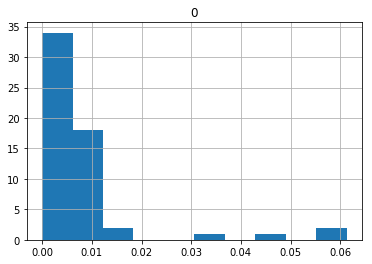

In [133]:
result_list_df.hist()

## 55, 57, 53번째 컬럼은 몇번 셀을 나타내는가?

In [132]:
X_test_reset_df.head(2)

,15_전압,16_전류,17_전압,18_전류,19_전압,20_전류,21_전압,22_전류,23_전압,24_전류,...,73_전압,74_전류,75_전압,76_전류,77_전압,78_전류,79_전압,80_전류,81_전압,82_전류
0,0.915489,0.60903,0.917651,0.612972,0.909722,0.613113,0.905349,0.610211,0.948883,0.0,...,0.913421,0.602099,0.911665,0.61516,0.921635,0.618066,0.917662,0.621896,0.918492,0.6127
1,0.009793,0.00000,0.009576,0.000000,0.009929,0.000000,0.009817,0.000000,0.033730,0.0,...,0.010612,0.000000,0.010309,0.00000,0.013109,0.000000,0.013113,0.000000,0.013006,0.0000


In [95]:
X_test_reset_df.columns[57], X_test_reset_df.columns[55], X_test_reset_df.columns[53]

('82_전류', '80_전류', '78_전류')

## 결론 

    결론 : 78, 80, 82 셀이 이상치가 높다. 다른 셀과 다른 영향을 받고 있거나(그늘이 지거나 고도가 낮은 위치라던지) 또는 셀이 고장났을 가능성이 있다.
    
    인사이트 : 태양광 셀의 위치정보 혹은 사진을 받아서 왜 그런지 알아보고, 78, 80, 82 셀이 같은 조건에 놓여있다면 셀이 고장났을 가능성이 있다. 따라서 그 셀을 제외하고 분석을 하면 더 좋은 결과가 나올 수 있다